## Zadanie 3

Poniższa tabela przedstawia zależność pomiędzy <b>Sprzedażą</b> produktu X a <b>Inwestycjami</b> w komunikację mediową (marketing) tego produktu.

| Inwestycje | Sprzedaż |
|--------|-------------|
| 10000 | 0.19 |
| 15000 | 0.36 |
| 30000 | 0.29 |
| 50000 | 0.38 |
| 60000 | 0.34 |
| 90000 | 1.13 |
| 100000 | 1.21 |
| 120000 | 1.56 |
| 140000 | 2.17 |
| 150000 | 1.92 |
| 225000 | 2.14 |
| 300000 | 2.43 |
| 400000 | 2.53 |


Twoim zadaniem jest znalezienie zależności pomiędzy tymi dwoma zmiennymi - dopasowanie postaci funkcyjnej zależności Sprzedaży od Inwestycji w taki sposób, aby najlepiej dopasowywała się do danych w tabeli. Prosimy o przedstawienie Twojego toku działań (sposobów znalezenia takiej postaci funkcyjnej oraz metod ich ewaluacji), a także wybór końcowej postaci funkcyjej wraz z oszacowanymi parametrami oraz wizualizacja wyników. Jaką wartość sprzedaży przewidujesz dla inwestycji na poziomie 20000, a jaką dla 450000?

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [11]:
data = {
    'Inwestycje': [10000, 15000, 30000, 50000, 60000, 90000, 100000, 120000, 140000, 150000, 225000, 300000, 400000],
    'Sprzedaż': [0.19, 0.36, 0.29, 0.38, 0.34, 1.13, 1.21, 1.56, 2.17, 1.92, 2.14, 2.43, 2.53]
}
df = pd.DataFrame(data)

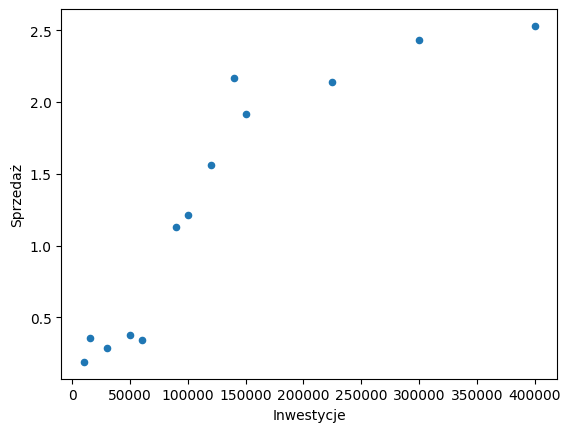

In [12]:
df.plot(kind='scatter', x='Inwestycje', y='Sprzedaż')
plt.show()

In [13]:
correlation = df.corr()

In [16]:
y = df['Sprzedaż'].values
X = df['Inwestycje'].values.reshape(-1, 1)
X

array([[ 10000],
       [ 15000],
       [ 30000],
       [ 50000],
       [ 60000],
       [ 90000],
       [100000],
       [120000],
       [140000],
       [150000],
       [225000],
       [300000],
       [400000]], dtype=int64)

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
y_pred_lin = lin_reg.predict(X)
r2_lin_reg = r2_score(y, y_pred_lin)
r2_lin_reg

0.7920446525305497

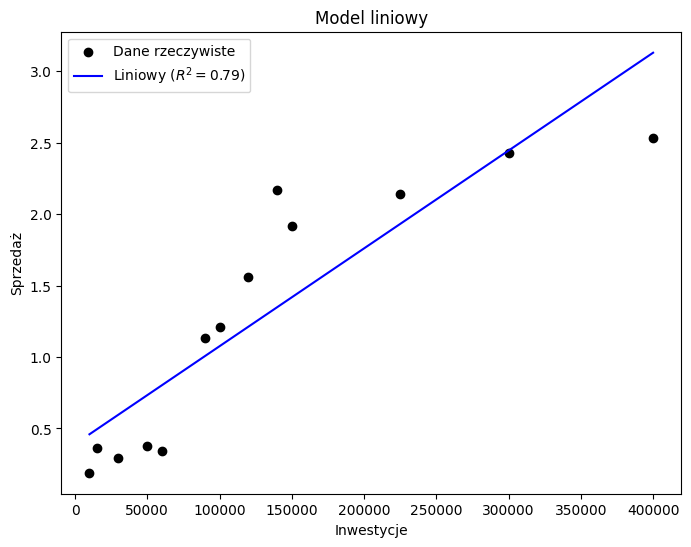

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(df['Inwestycje'], df['Sprzedaż'], color='black', label='Dane rzeczywiste')
plt.plot(df['Inwestycje'], y_pred_lin, color='blue', label=f'Liniowy ($R^2={r2_lin_reg:.2f}$)')
plt.title('Model liniowy')
plt.xlabel('Inwestycje')
plt.ylabel('Sprzedaż')
plt.legend()
plt.show()

In [22]:
X_log = np.log(df['Inwestycje']).values.reshape(-1, 1)
log_model = LinearRegression()
log_model.fit(X_log, y)
y_pred_log = log_model.predict(X_log)
r2_log = r2_score(y, y_pred_log)
r2_log

0.8329083736196824

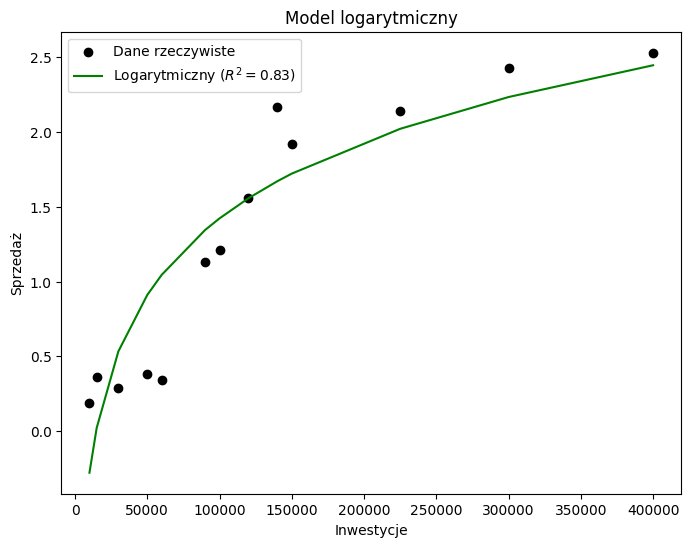

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Inwestycje'], df['Sprzedaż'], color='black', label='Dane rzeczywiste')
plt.plot(df['Inwestycje'], y_pred_log, color='green', label=f'Logarytmiczny ($R^2={r2_log:.2f}$)')
plt.xlabel('Inwestycje')
plt.ylabel('Sprzedaż')
plt.legend()
plt.title('Model logarytmiczny')
plt.show()

In [24]:
X_exp = df['Inwestycje'].values
y_log = np.log(y)
exp_model = LinearRegression()
exp_model.fit(X_exp.reshape(-1, 1), y_log)
y_pred_exp = np.exp(exp_model.predict(X_exp.reshape(-1, 1)))
r2_exp = r2_score(y, y_pred_exp)

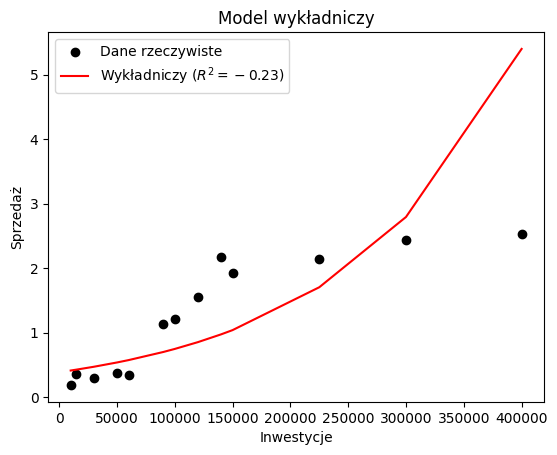

In [25]:
plt.scatter(df['Inwestycje'], df['Sprzedaż'], color='black', label='Dane rzeczywiste')
plt.plot(df['Inwestycje'], y_pred_exp, color='red', label=f'Wykładniczy ($R^2={r2_exp:.2f}$)')
plt.xlabel('Inwestycje')
plt.ylabel('Sprzedaż')
plt.legend()
plt.title('Model wykładniczy')
plt.show()

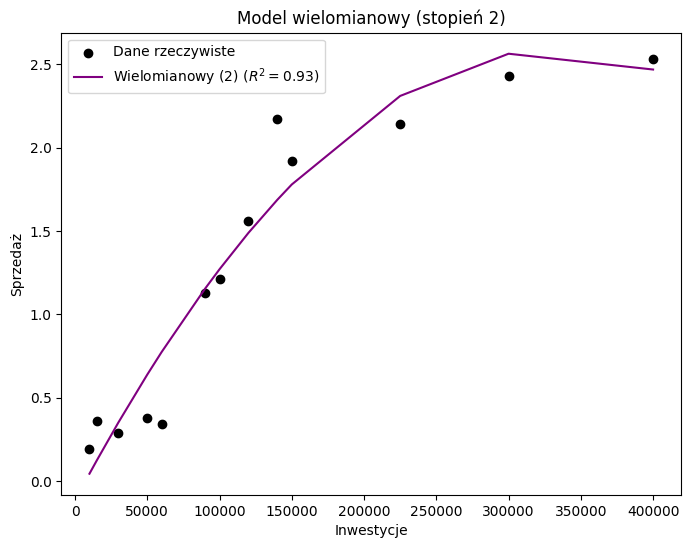

In [31]:
poly_2 = PolynomialFeatures(degree=2)
X_poly_2 = poly_2.fit_transform(X)
poly_model_2 = LinearRegression()
poly_model_2.fit(X_poly_2, y)
y_pred_poly_2 = poly_model_2.predict(X_poly_2)
r2_poly_2 = r2_score(y, y_pred_poly_2)

plt.figure(figsize=(8, 6))
plt.scatter(df['Inwestycje'], df['Sprzedaż'], color='black', label='Dane rzeczywiste')
plt.plot(df['Inwestycje'], y_pred_poly_2, color='purple', label=f'Wielomianowy (2) ($R^2={r2_poly_2:.2f}$)')
plt.xlabel('Inwestycje')
plt.ylabel('Sprzedaż')
plt.legend()
plt.title('Model wielomianowy (stopień 2)')
plt.show()

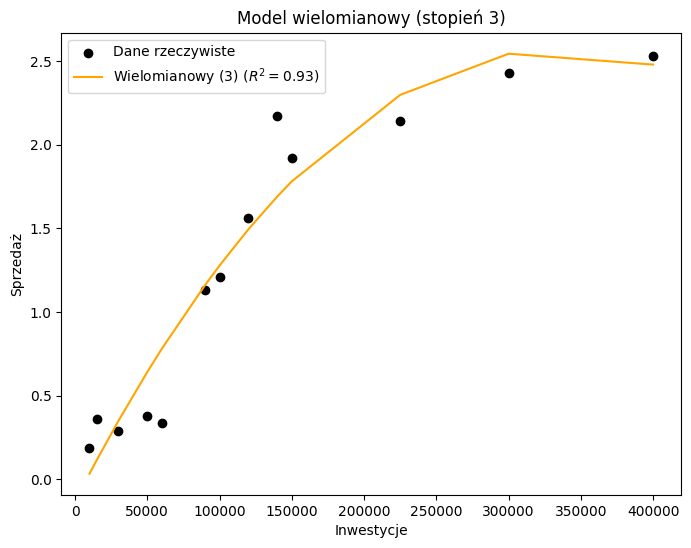

In [33]:
poly_3 = PolynomialFeatures(degree=3)
X_poly_3 = poly_3.fit_transform(X)
poly_model_3 = LinearRegression()
poly_model_3.fit(X_poly_3, y)
y_pred_poly_3 = poly_model_3.predict(X_poly_3)
r2_poly_3 = r2_score(y, y_pred_poly_3)

plt.figure(figsize=(8, 6))
plt.scatter(df['Inwestycje'], df['Sprzedaż'], color='black', label='Dane rzeczywiste')
plt.plot(df['Inwestycje'], y_pred_poly_3, color='orange', label=f'Wielomianowy (3) ($R^2={r2_poly_3:.2f}$)')
plt.xlabel('Inwestycje')
plt.ylabel('Sprzedaż')
plt.legend()
plt.title('Model wielomianowy (stopień 3)')
plt.show()

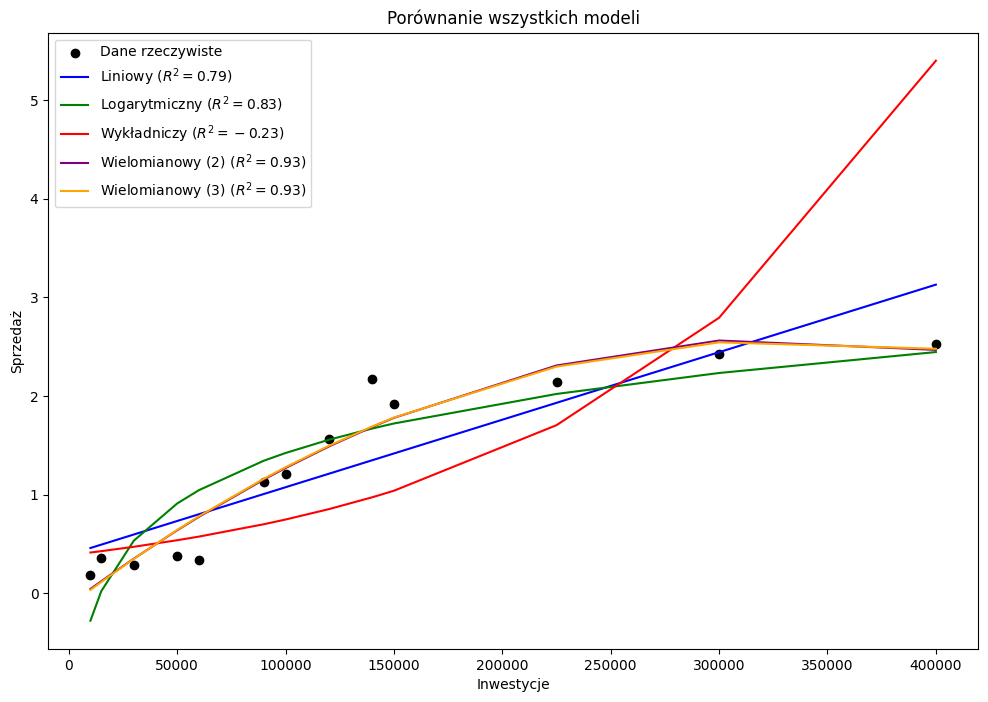

In [34]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Inwestycje'], df['Sprzedaż'], color='black', label='Dane rzeczywiste')
plt.plot(df['Inwestycje'], y_pred_lin, color='blue', label=f'Liniowy ($R^2={r2_lin_reg:.2f}$)')
plt.plot(df['Inwestycje'], y_pred_log, color='green', label=f'Logarytmiczny ($R^2={r2_log:.2f}$)')
plt.plot(df['Inwestycje'], y_pred_exp, color='red', label=f'Wykładniczy ($R^2={r2_exp:.2f}$)')
plt.plot(df['Inwestycje'], y_pred_poly_2, color='purple', label=f'Wielomianowy (2) ($R^2={r2_poly_2:.2f}$)')
plt.plot(df['Inwestycje'], y_pred_poly_3, color='orange', label=f'Wielomianowy (3) ($R^2={r2_poly_3:.2f}$)')
plt.xlabel('Inwestycje')
plt.ylabel('Sprzedaż')
plt.legend()
plt.title('Porównanie wszystkich modeli')
plt.show()

In [37]:
investment_1 = 20000
investment_2 = 450000

prediction_1_poly_2 = poly_model_2.predict(poly_2.transform([[investment_1]]))[0]
prediction_2_poly_2 = poly_model_2.predict(poly_2.transform([[investment_2]]))[0]
prediction_1_poly_3 = poly_model_3.predict(poly_3.transform([[investment_1]]))[0]
prediction_2_poly_3 = poly_model_3.predict(poly_3.transform([[investment_2]]))[0]

results = {
    'Model': ['Liniowy', 'Logarytmiczny', 'Wykładniczy', 'Wielomianowy (2)', 'Wielomianowy (3)'],
    'R2': [r2_lin_reg, r2_log, r2_exp, r2_poly_2, r2_poly_3, ],
    'Prognoza 20000': [r2_lin_reg, r2_log, r2_exp, prediction_1_poly_2, prediction_1_poly_3],
    'Prognoza 450000': [r2_lin_reg, r2_log, r2_exp, prediction_2_poly_2, prediction_2_poly_3]
}

results_df = pd.DataFrame(results)
print(results_df)

              Model        R2  Prognoza 20000  Prognoza 450000
0           Liniowy  0.792045        0.792045         0.792045
1     Logarytmiczny  0.832908        0.832908         0.832908
2       Wykładniczy -0.227168       -0.227168        -0.227168
3  Wielomianowy (2)  0.932566        0.199917         2.235511
4  Wielomianowy (3)  0.932669        0.194280         2.289733


### Najlepsze modele

Modele wielomianowe (stopień 2 i 3) okazały się najlepsze, uzyskując najwyższe współczynniki determinacji \( R^2 \). Oto ich szczegółowe wyniki:

- **Model wielomianowy (stopień 2)**:
  - \( R^2 = 0.93 \)
  - Prognoza dla inwestycji 20,000: 0.20
  - Prognoza dla inwestycji 450,000: 2.24

- **Model wielomianowy (stopień 3)**:
  - \( R^2 = 0.93 \)
  - Prognoza dla inwestycji 20,000: 0.19
  - Prognoza dla inwestycji 450,000: 2.29

### Wyniki

| Model               | \( R^2 \)  | Prognoza dla 20,000 | Prognoza dla 450,000 |
|---------------------|------------|---------------------|----------------------|
| Wielomianowy (2)    | 0.932566   | 0.20                | 2.24                 |
| Wielomianowy (3)    | 0.932669   | 0.19                | 2.29                 |

### Wnioski

Modele wielomianowe stopnia 2 i 3 są najbardziej dopasowane do danych. Dla inwestycji na poziomie 20,000 prognozują sprzedaż w okolicach 0.19 - 0.20, natomiast dla inwestycji 450,000 prognozują sprzedaż w zakresie 2.24 - 2.29.


In [39]:
investment_1 = 20000
investment_2 = 450000

prediction_1_poly_2 = poly_model_2.predict(poly_2.transform([[investment_1]]))[0]
prediction_2_poly_2 = poly_model_2.predict(poly_2.transform([[investment_2]]))[0]
prediction_1_poly_3 = poly_model_3.predict(poly_3.transform([[investment_1]]))[0]
prediction_2_poly_3 = poly_model_3.predict(poly_3.transform([[investment_2]]))[0]

results = {
    'Model': ['Wielomianowy (2)', 'Wielomianowy (3)'],
    'R2': [r2_poly_2, r2_poly_3],
    'Prognoza 20000': [prediction_1_poly_2, prediction_1_poly_3],
    'Prognoza 450000': [prediction_2_poly_2, prediction_2_poly_3]
}

results_df = pd.DataFrame(results)
print(results_df)

              Model        R2  Prognoza 20000  Prognoza 450000
0  Wielomianowy (2)  0.932566        0.199917         2.235511
1  Wielomianowy (3)  0.932669        0.194280         2.289733
